# About Data:
    
This is a dataset containing credit card transactions with 31 features and a class label. The features represent various aspects of the transaction, and the class label indicates whether the transaction was fraudulent (class 1) or not (class 0).

The first feature is "Time", which represents the number of seconds elapsed between the transaction and the first transaction in the dataset. The next 28 features, V1 to V28, are anonymized variables resulting from a principal component analysis (PCA) transformation of the original features. They represent different aspects of the transaction, such as the amount, location, and type of transaction.

The second last feature is "Amount", which represents the transaction amount in USD. The last feature is the "Class" label, which indicates whether the transaction is fraudulent (class 1) or not (class 0).

Overall, this dataset is used to train machine learning models to detect fraudulent transactions in real-time. The features are used to train the model to learn patterns in the data, which can then be used to detect fraudulent transactions in future transactions.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

,count
Class,
0,284315
1,492


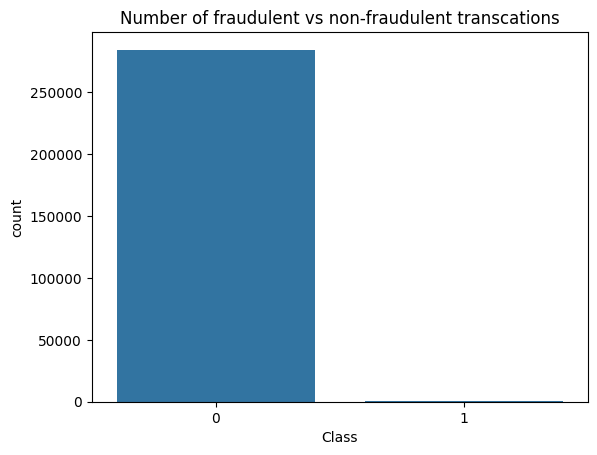

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

# What is relationship of fraud transactions with amount of money?
Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.

We hypothesise based on our scatter plot that all fraud transactions occur for an amount less than 2500.

In [ ]:

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

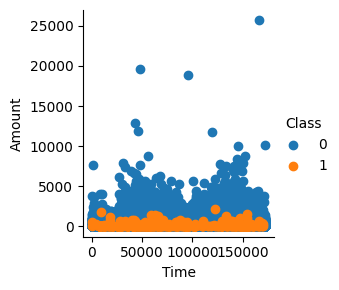

In [ ]:
pairplot_data_grid(data, "Time", "Amount", "Class")

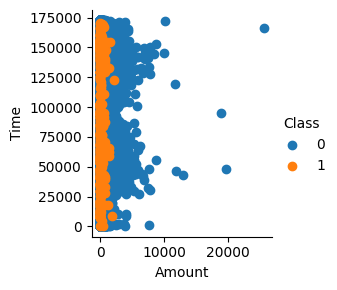

In [ ]:
pairplot_data_grid(data, "Amount", "Time", "Class")

# Insights:
It can be observed that the fraud transactions are generally not above an amount of 2500.
It can also be observed that the fraud transactions are evenly distributed about time.


<ipython-input-11-4f21dc980e05>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-11-4f21dc980e05>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


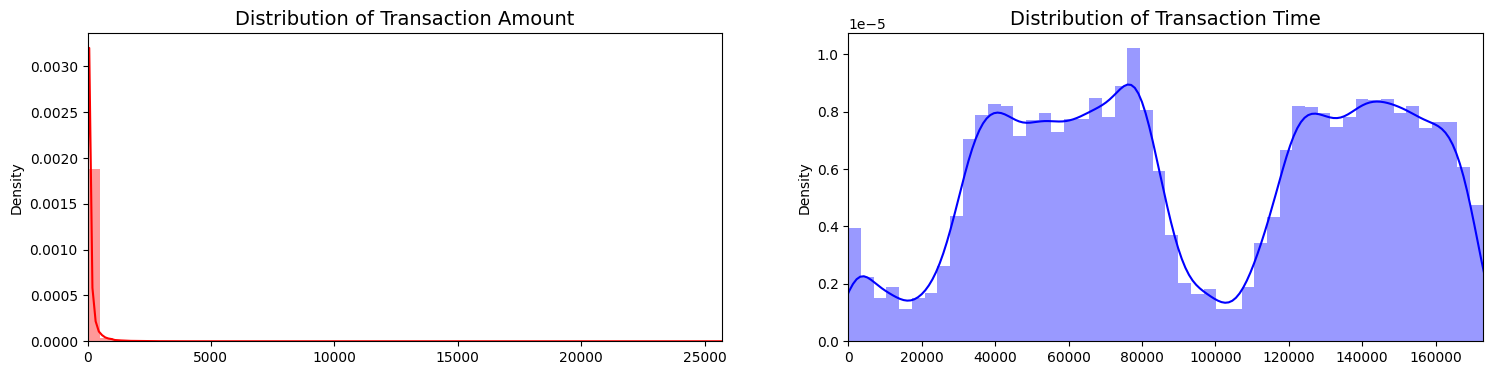

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()


The first line of code creates a new dataframe called "legit" by selecting only the rows from the original "data" dataframe where the "Class" label is equal to 0. In other words, it filters out all transactions labeled as fraudulent (Class == 1) and keeps only the legitimate transactions (Class == 0).

The second line of code creates a new dataframe called "fraud" by selecting only the rows from the original "data" dataframe where the "Class" label is equal to 1. This filters out all legitimate transactions and keeps only the fraudulent transactions.

By separating the data into two dataframes, it becomes easier to analyze and compare the characteristics of legitimate and fraudulent transactions separately. This can be useful for identifying patterns or features that are more common in fraudulent transactions, which can then be used to develop models for fraud detection.

In [ ]:
legit = data[data.Class==0]
fraud = data[data['Class']==1]

In [ ]:
fraud['Class']

,Class
541,1
623,1
4920,1
6108,1
6329,1
...,...
279863,1
280143,1
280149,1
281144,1


In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


<ipython-input-17-c7e3606d0499>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
<ipython-input-17-c7e3606d0499>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)


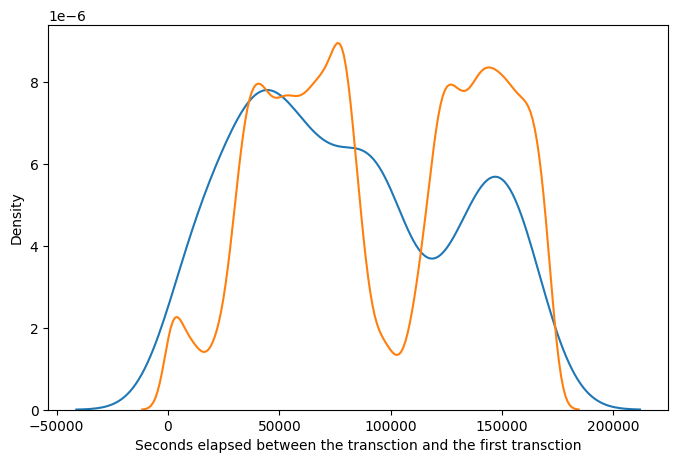

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

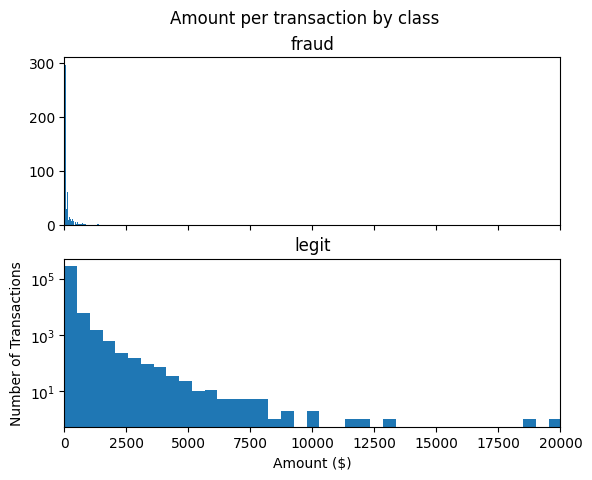

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

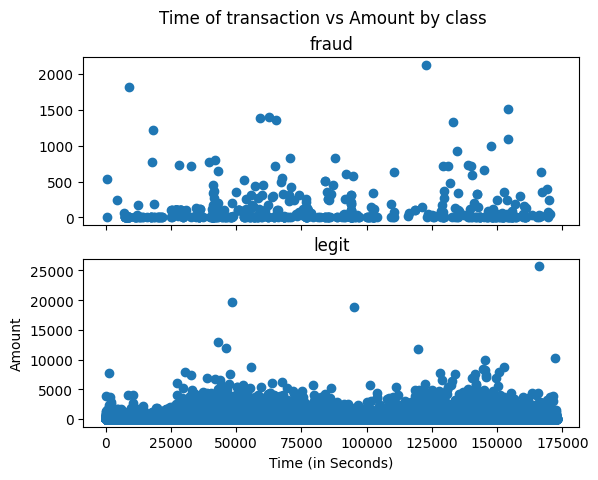

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

From the above scatter plot, it is clear that the fraudulent transactions are spread throughout the time period

<Axes: >

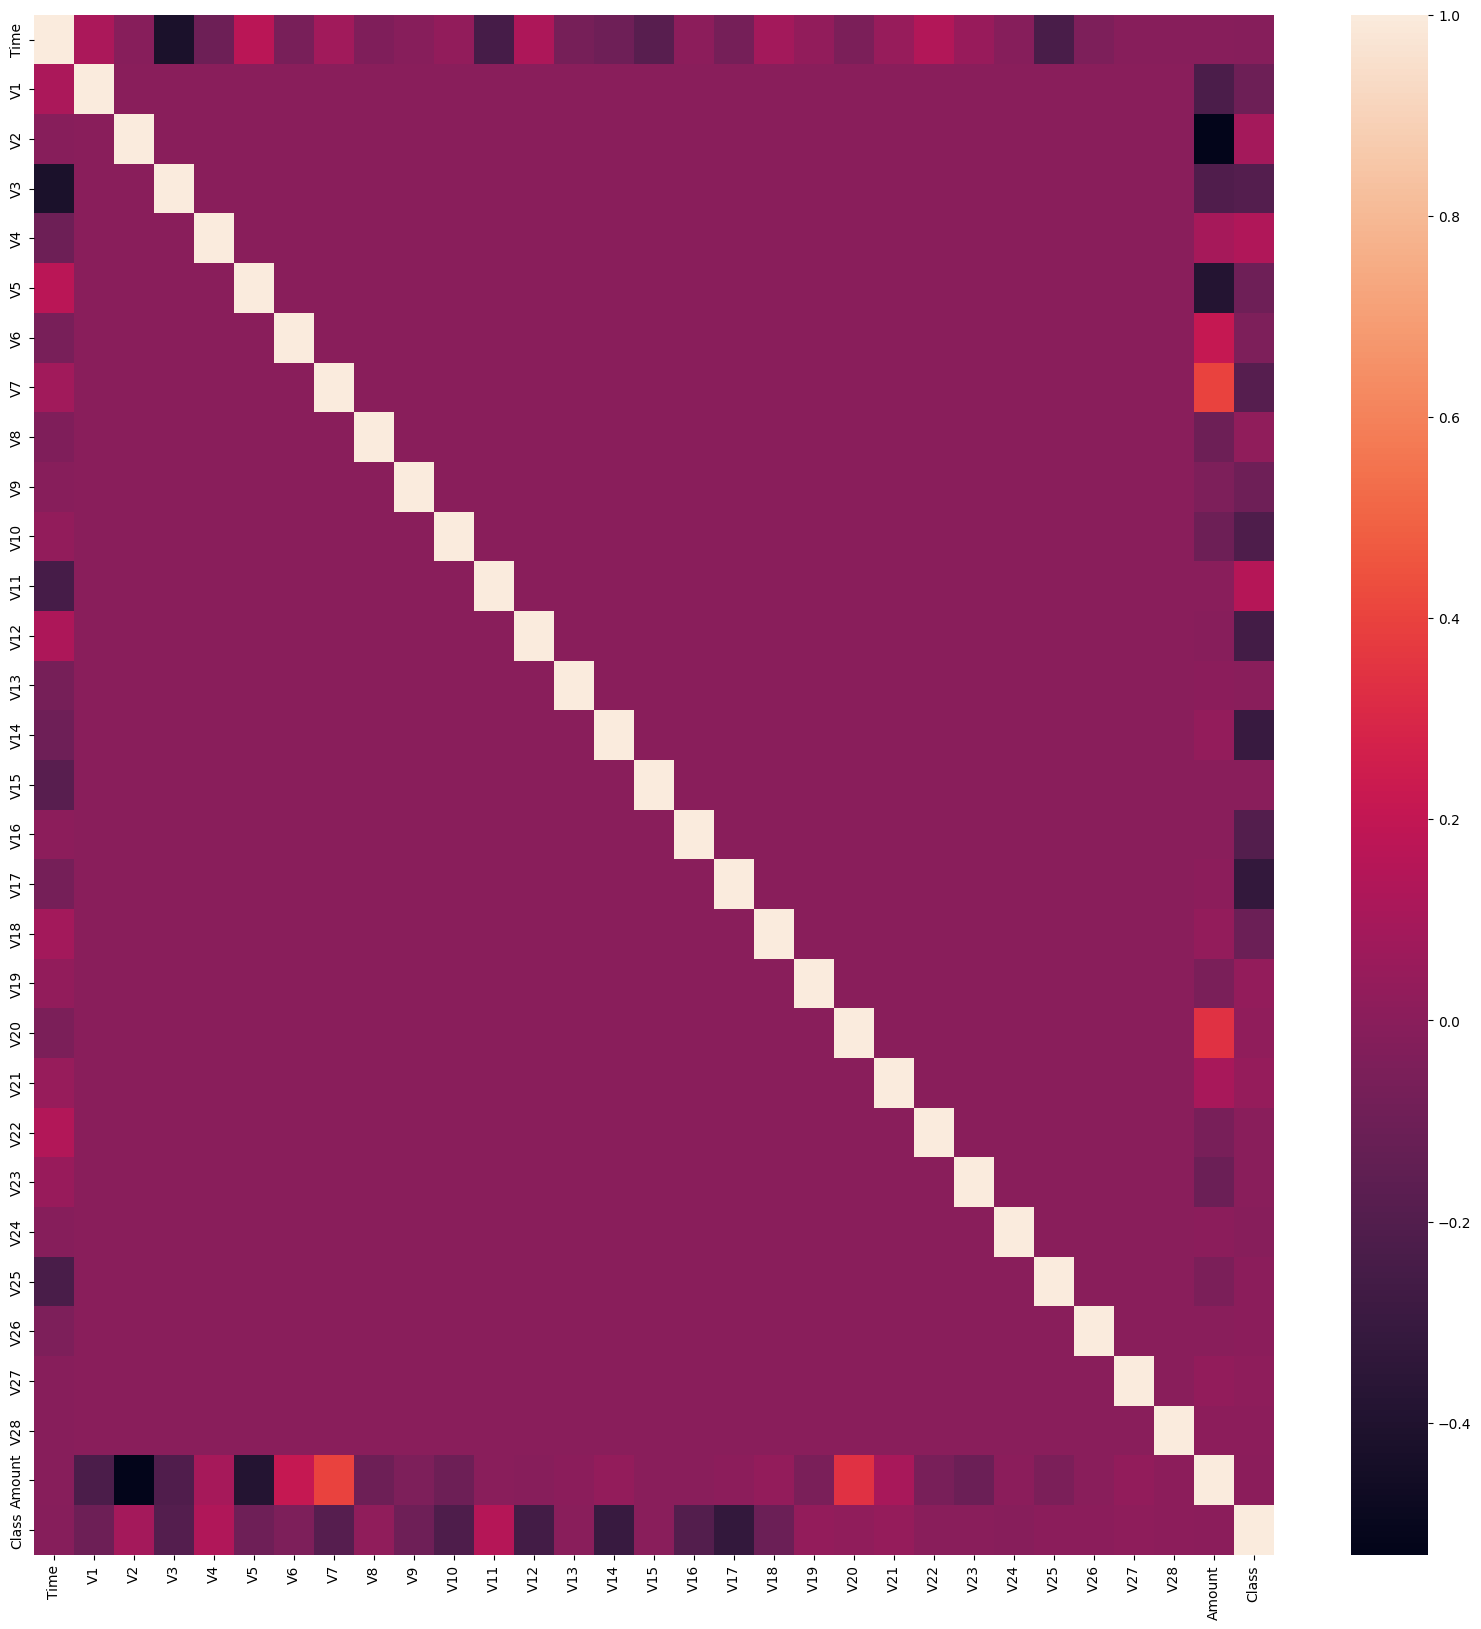

In [ ]:
plt.figure(figsize=(20,20))
data_corr = data.corr()
sns.heatmap(data_corr)

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']


data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
data.shape


(284807, 31)

# Undersampling used to balance the fraud and legitimate transactions in data

Number of Fraudulent Transactions --> 492

In [ ]:

data = data.sample(frac=1, random_state=42)

# Number of fraud classes (492 rows)
fraud_df = data[data['Class'] == 1]

# Number of non-fraud classes (also 492 rows)
legit_df = data[data['Class'] == 0][:492]

# Concatenate both fraud and non-fraud samples
df = pd.concat([fraud_df, legit_df])

# Shuffle the concatenated dataframe
df = df.sample(frac=1, random_state=42)

# Print the length of the new balanced dataframe
print(len(df))



984


In [ ]:
df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
146884,-0.293579,0.038170,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,...,-0.209856,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
96768,1.872424,-0.220456,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,...,-0.294785,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0
75511,2.080905,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239499,0.391253,0.768877,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,1
43624,0.243834,-0.506467,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,...,0.644993,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,1
103626,-0.296793,-0.187432,-3.599934,4.022775,-2.735797,0.416448,-0.546681,1.114840,-3.332706,-3.035458,...,1.173588,-2.353510,0.747557,0.369075,-1.460187,-0.041429,0.497594,-0.623617,0.009661,0
119714,0.111088,-0.107332,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,...,0.864536,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,1


In [ ]:
df['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
from matplotlib.colors import ListedColormap

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


<ipython-input-28-8bdb9430001d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Class', data=df, palette=colors)


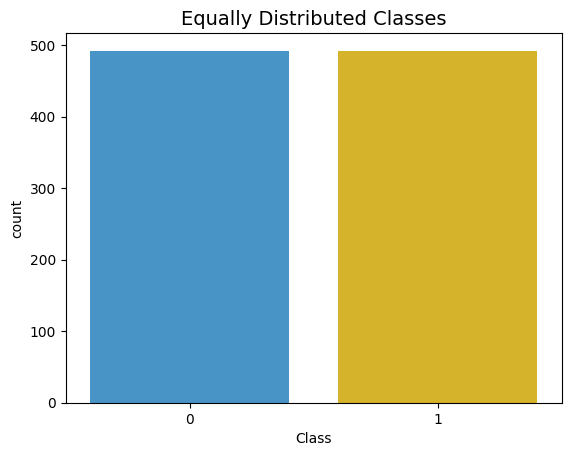

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(df['Class'].value_counts(normalize=True))


colors = ['#3498db', '#f1c40f']
sns.countplot(x= 'Class', data=df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

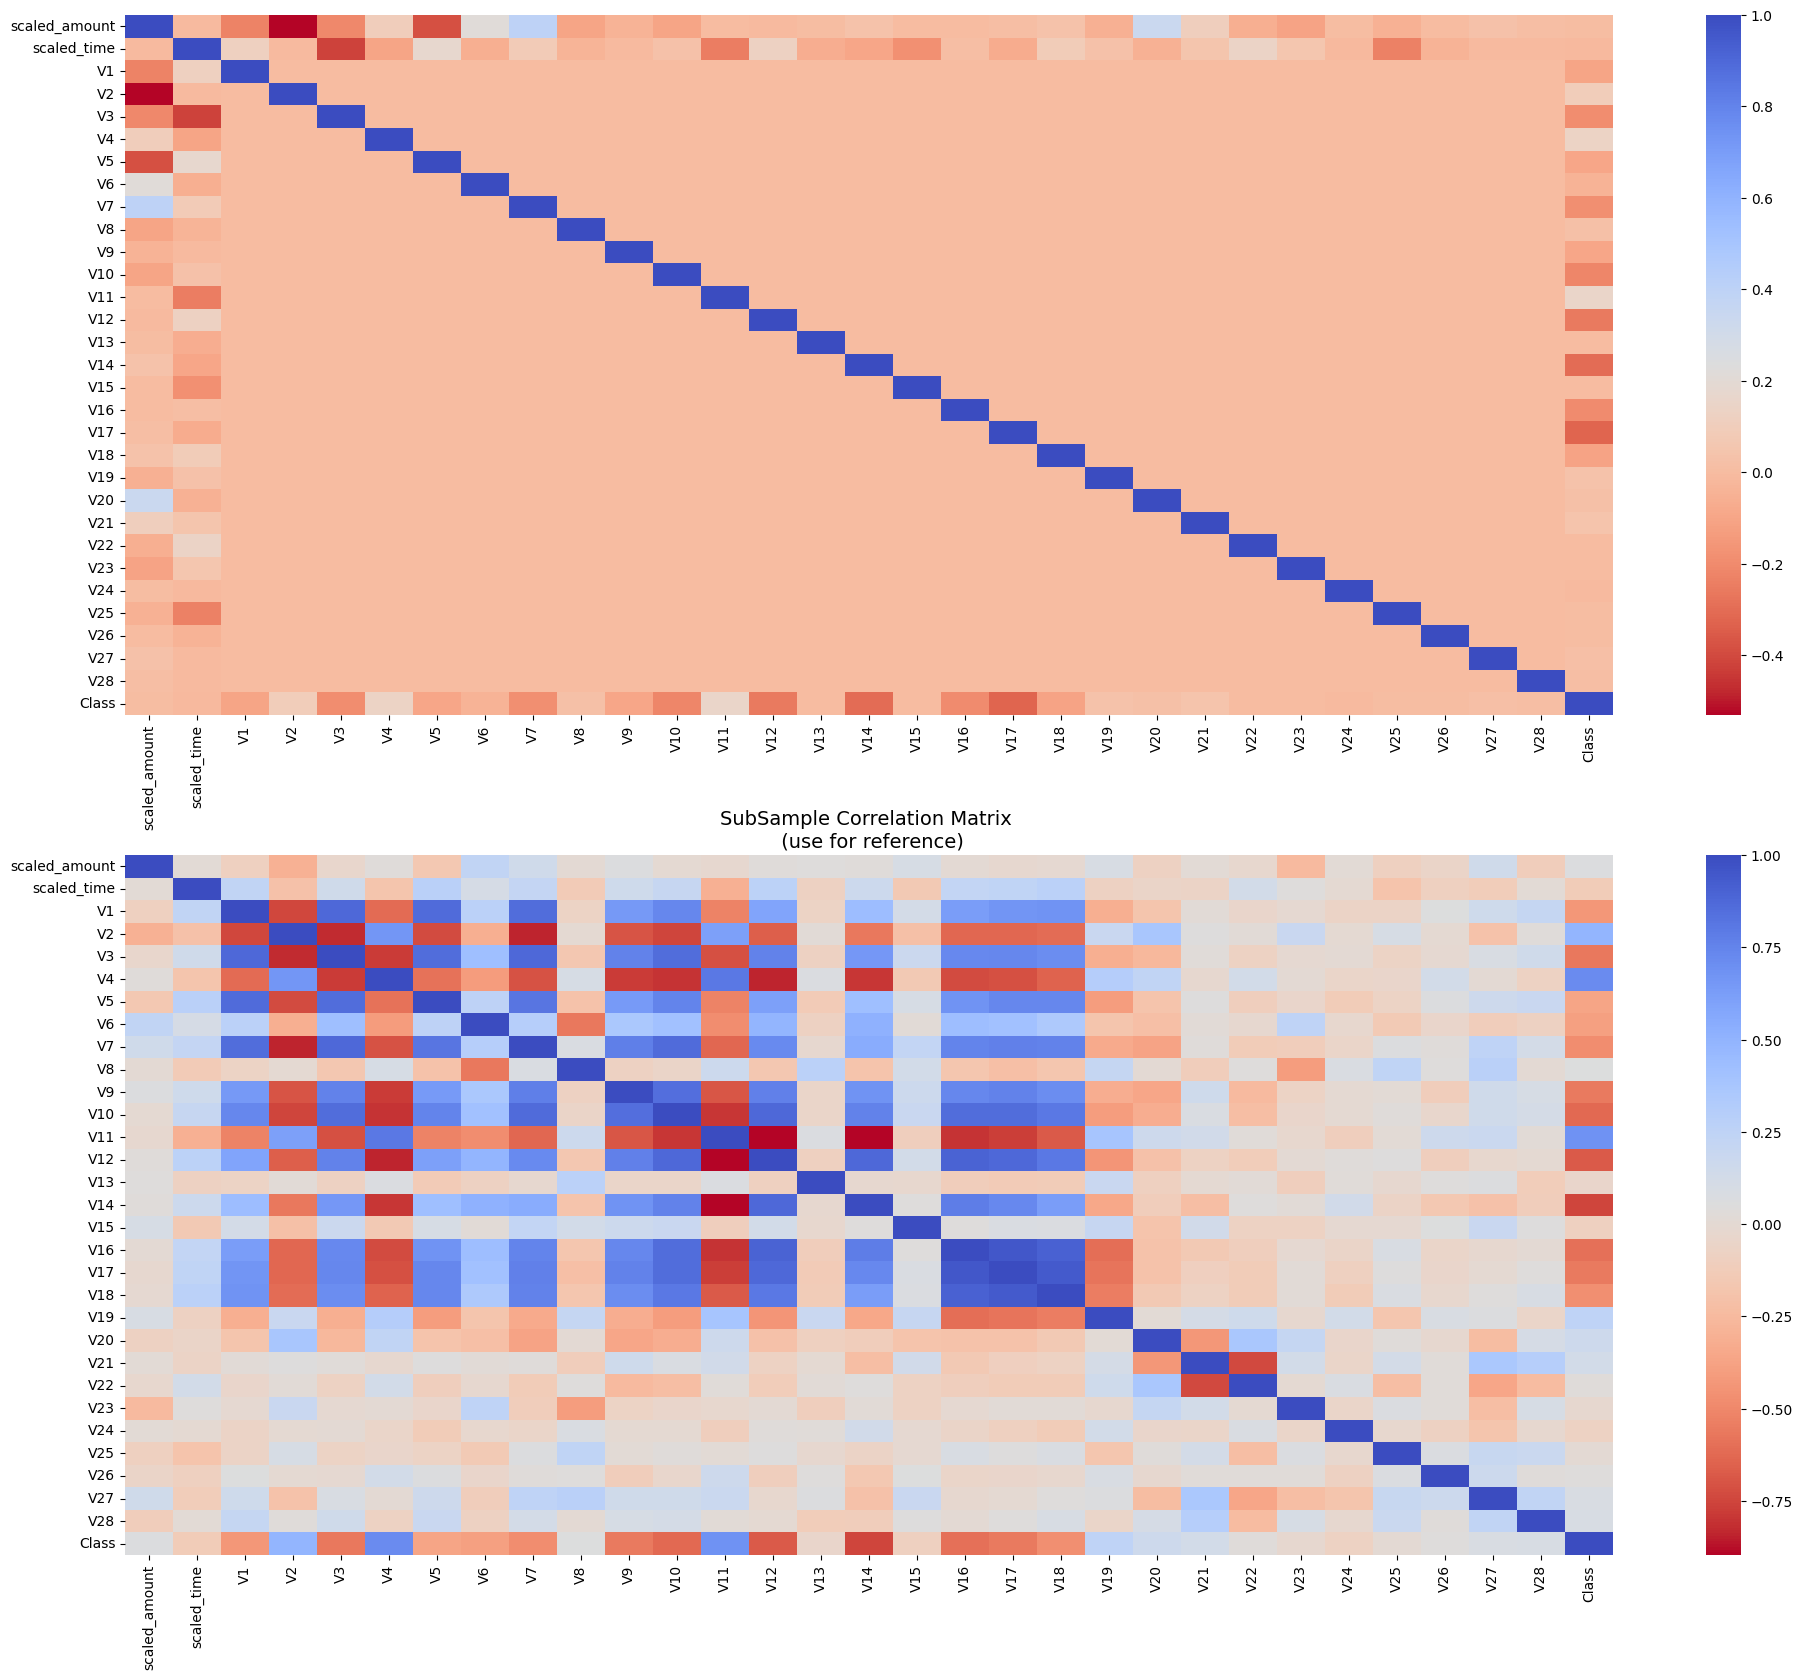

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
df.corrwith(df["Class"])

,0
scaled_amount,0.065625
scaled_time,-0.132689
V1,-0.430676
V2,0.490349
V3,-0.563496
V4,0.717834
V5,-0.370061
V6,-0.386495
V7,-0.475045
V8,0.058153


In [ ]:
df.groupby('Class').mean()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,,,,,,,,
0,0.931147,0.102126,0.027972,-0.087063,-0.031019,-0.053613,-0.004577,-0.025601,0.002104,0.006812,...,0.049220,-0.032092,-0.012541,-0.056375,-0.001749,-0.01827,0.032166,0.009685,-0.002719,-0.006014
1,1.400284,-0.046349,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667


# Outliers treatment
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

In [ ]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

In [ ]:
print(X.shape)
print(y.shape)

(984, 30)
(984,)


In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Building
We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model. And, in the same way, a single line of code can fit the model on our data.

We can also tune these models by selecting different optimized parameters. But, if the accuracy is better even with less parameter tuning then — no need to make it complex.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic regression model creation
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)


In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
n_outliers = len(fraud)
n_errors = (y_pred_logreg != y_test).sum()
print("The model used is Logistic regression")

acc = accuracy_score(y_test, y_pred_logreg)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred_logreg)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred_logreg)
print("The recall is {}".format(rec))

roc_auc = roc_auc_score(y_test, y_pred_logreg)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))

f1 = f1_score(y_test, y_pred_logreg)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred_logreg)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Logistic regression
The accuracy is 0.934010152284264
The precision is 0.9473684210526315
The recall is 0.9183673469387755
The ROC AUC Score is 0.9339311482168625
The F1-Score is 0.9326424870466321
The Matthews correlation coefficient is0.868399506201315


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model creation
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)


In [ ]:
n_outliers = len(fraud)
n_errors = (y_pred_dt != y_test).sum()
print("The model used is Decision Tree")

acc = accuracy_score(y_test, y_pred_dt)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred_dt)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred_dt)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred_dt)
print("The F1-Score is {}".format(f1))


The model used is Decision Tree
The accuracy is 0.8984771573604061
The precision is 0.89
The recall is 0.9081632653061225
The F1-Score is 0.8989898989898989


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors model creation
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)


In [ ]:
n_outliers = len(fraud)
n_errors = (y_pred_knn != y_test).sum()
print("The model used is KNN")

acc = accuracy_score(y_test, y_pred_knn)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred_knn)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred_knn)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred_knn)
print("The F1-Score is {}".format(f1))

roc_auc = roc_auc_score(y_test, y_pred_knn)  # Calculate ROC AUC score
print("The ROC AUC Score is {}".format(roc_auc))

MCC = matthews_corrcoef(y_test, y_pred_knn)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is KNN
The accuracy is 0.9441624365482234
The precision is 0.9887640449438202
The recall is 0.8979591836734694
The F1-Score is 0.9411764705882354
The ROC AUC Score is 0.9439290867862297
The Matthews correlation coefficient is0.8920051282881389


In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, matthews_corrcoef, precision_score

# ... Your model creation and prediction code ...

# Create a PrettyTable instance
myTable = PrettyTable(["Model", "Accuracy Score", "F1 Score", "ROC AUC Score", "Recall Score", "Matthews Corr. Coef.", "Precision Score"])

# Add rows to the table with formatted scores
myTable.add_row(["Logistic Regression", f"{accuracy_score(y_test, y_pred_logreg):.4f}", f"{f1_score(y_test, y_pred_logreg):.4f}", f"{roc_auc_score(y_test, y_pred_logreg):.4f}", f"{recall_score(y_test, y_pred_logreg):.4f}", f"{matthews_corrcoef(y_test, y_pred_logreg):.4f}", f"{precision_score(y_test, y_pred_logreg):.4f}"])
myTable.add_row(["Decision Tree", f"{accuracy_score(y_test, y_pred_dt):.4f}", f"{f1_score(y_test, y_pred_dt):.4f}", f"{roc_auc_score(y_test, y_pred_dt):.4f}", f"{recall_score(y_test, y_pred_dt):.4f}", f"{matthews_corrcoef(y_test, y_pred_dt):.4f}", f"{precision_score(y_test, y_pred_dt):.4f}"])
myTable.add_row(["K-Nearest Neighbors", f"{accuracy_score(y_test, y_pred_knn):.4f}", f"{f1_score(y_test, y_pred_knn):.4f}", f"{roc_auc_score(y_test, y_pred_knn):.4f}", f"{recall_score(y_test, y_pred_knn):.4f}", f"{matthews_corrcoef(y_test, y_pred_knn):.4f}", f"{precision_score(y_test, y_pred_knn):.4f}"])

# Print the table
print(myTable)

+---------------------+----------------+----------+---------------+--------------+----------------------+-----------------+
|        Model        | Accuracy Score | F1 Score | ROC AUC Score | Recall Score | Matthews Corr. Coef. | Precision Score |
+---------------------+----------------+----------+---------------+--------------+----------------------+-----------------+
| Logistic Regression |     0.9340     |  0.9326  |     0.9339    |    0.9184    |        0.8684        |      0.9474     |
|    Decision Tree    |     0.8985     |  0.8990  |     0.8985    |    0.9082    |        0.7971        |      0.8900     |
| K-Nearest Neighbors |     0.9442     |  0.9412  |     0.9439    |    0.8980    |        0.8920        |      0.9888     |
+---------------------+----------------+----------+---------------+--------------+----------------------+-----------------+


# K-Nearest Neighbors is the winner

# Summary
All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.

The fraud transactions are equitable distributed throughout time and there is no clear relationship of time with commiting of fraud.

The number of fraud transactions are very few comparted to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.